C:\Users\praja\AppData\Local\Temp\ipykernel_23536\2633376912.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(np.logical_xor(X_train[:, 0] > 0, X_train[:, 1] > 0), dtype=torch.float32).view(-1, 1)
C:\Users\praja\AppData\Local\Temp\ipykernel_23536\2633376912.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(np.logical_xor(X_test[:, 0] > 0, X_test[:, 1] > 0), dtype=torch.float32).view(-1, 1)


Final optimized parameters for MLP:
fc1.weight: Parameter containing:
tensor([[-0.3021, -0.2672],
        [ 1.8459,  6.6080],
        [-0.1549,  0.1427],
        [-1.7540,  5.7894],
        [ 0.0197,  0.0843],
        [-0.0457, -0.5587],
        [-0.2016, -0.1772],
        [ 0.3410, -0.0998],
        [ 0.8586,  2.6937],
        [-0.3301,  0.1802]], requires_grad=True)
fc1.bias: Parameter containing:
tensor([-1.1616, -0.8936, -0.2872, -1.1090, -1.1609, -0.9737, -0.9059, -0.4252,
        -0.4934, -0.6984], requires_grad=True)
fc2.weight: Parameter containing:
tensor([[-0.4886, -3.0059,  0.2441,  4.8282,  0.5433, -0.4411, -0.5502,  0.2555,
         -2.7219, -0.0997]], requires_grad=True)
fc2.bias: Parameter containing:
tensor([0.0937], requires_grad=True)
Final optimized parameters for MLP_L1:
fc1.weight: Parameter containing:
tensor([[ 2.8205e-02, -3.3431e-02],
        [ 3.9024e-03, -4.6620e-04],
        [-1.0893e-02, -5.2780e-02],
        [ 1.8428e+00,  1.4001e+00],
        [-1.1721e+00

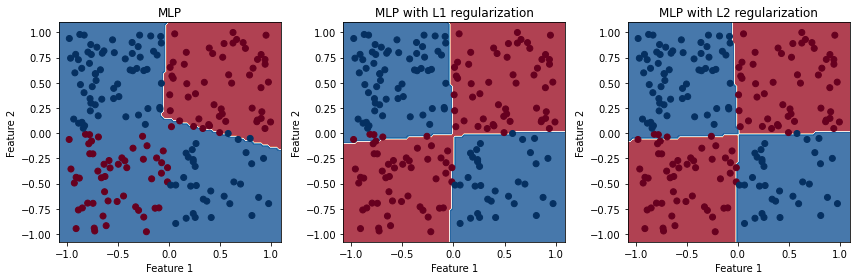

In [9]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Generate XOR dataset
X_train = torch.tensor(np.random.rand(200, 2) * 2 - 1, dtype=torch.float32)
y_train = torch.tensor(np.logical_xor(X_train[:, 0] > 0, X_train[:, 1] > 0), dtype=torch.float32).view(-1, 1)

X_test = torch.tensor(np.random.rand(200, 2) * 2 - 1, dtype=torch.float32)
y_test = torch.tensor(np.logical_xor(X_test[:, 0] > 0, X_test[:, 1] > 0), dtype=torch.float32).view(-1, 1)

# Define MLP model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(2, 10)
        self.fc2 = nn.Linear(10, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x
        

# Define MLP with L1 regularization
class MLP_L1(nn.Module):
    def __init__(self):
        super(MLP_L1, self).__init__()
        self.fc1 = nn.Linear(2, 10)
        self.fc2 = nn.Linear(10, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

# Define MLP with L2 regularization
class MLP_L2(nn.Module):
    def __init__(self):
        super(MLP_L2, self).__init__()
        self.fc1 = nn.Linear(2, 10)
        self.fc2 = nn.Linear(10, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

# Train MLP model
def train_model(model, X_train, y_train, epochs=100, lr = 0.1):
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # # Print initial parameters
    # print(f"Initial parameters for {type(model).__name__}:")
    # for name, param in model.named_parameters():
    #     print(f"{name}: {param}")

    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        # if epoch % 30 == 0:
        #     print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")

    # Print final optimized parameters
    print(f"Final optimized parameters for {type(model).__name__}:")
    for name, param in model.named_parameters():
        print(f"{name}: {param}")

# Train MLP with L1 regularization model
def train_model_l1(model, X_train, y_train, epochs=100, lambda_l1=0.01, lr =0.1):
    criterion_l1 = nn.BCELoss()
    optimizer_l1 = optim.Adam(model.parameters(), lr=lr)

    for epoch in range(epochs):
        optimizer_l1.zero_grad()
        outputs = model(X_train)
        loss = criterion_l1(outputs, y_train)
        l1_reg = torch.tensor(0., requires_grad=False)
        for param in model.parameters():
            l1_reg += torch.norm(param, 1)
        loss += lambda_l1 * l1_reg
        loss.backward()
        optimizer_l1.step()

        # Print final optimized parameters
    print(f"Final optimized parameters for {type(model).__name__}:")
    for name, param in model.named_parameters():
        print(f"{name}: {param}")

# Train MLP with L2 regularization model
def train_model_l2(model, X_train, y_train, epochs=100, lambda_l2=0.01, lr =0.1):
    criterion_l2 = nn.BCELoss()
    optimizer_l2 = optim.Adam(model.parameters(), lr=lr)

    for epoch in range(epochs):
        optimizer_l2.zero_grad()
        outputs = model(X_train)
        loss = criterion_l2(outputs, y_train)
        l2_reg = torch.tensor(0., requires_grad=False)
        for param in model.parameters():
            l2_reg += torch.norm(param, 2)
        loss += lambda_l2 * l2_reg
        loss.backward()
        optimizer_l2.step()

    # Print final optimized parameters
    print(f"Final optimized parameters for {type(model).__name__}:")
    for name, param in model.named_parameters():
        print(f"{name}: {param}")

# Initialize models
mlp_model = MLP()
mlp_l1_model = MLP_L1()
mlp_l2_model = MLP_L2()

# Train models
train_model(mlp_model, X_train, y_train)
train_model_l1(mlp_l1_model, X_train, y_train)
train_model_l2(mlp_l2_model, X_train, y_train)

# Evaluate the model
def evaluate_model(model, X_test, y_test, model_name):
    with torch.no_grad():
        model.eval()
        outputs = model(X_test)
        predicted = (outputs >= 0.5).float()
        accuracy = (predicted == y_test).float().mean()
        print(f"Accuracy of using {model_name}: {accuracy.item()}")

evaluate_model(mlp_model, X_test, y_test, 'MLP')
evaluate_model(mlp_l1_model, X_test, y_test, 'MLP with L1 reg')
evaluate_model(mlp_l2_model, X_test, y_test, 'MLP with L2 reg')

# Plot decision boundaries
def plot_decision_boundary(model, X, y):
    model.eval()
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = torch.meshgrid(torch.linspace(x_min, x_max, 100), torch.linspace(y_min, y_max, 100))
    Z = model(torch.cat((xx.reshape(-1, 1), yy.reshape(-1, 1)), dim=1))
    Z = (Z > 0.5).float().reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plot_decision_boundary(mlp_model, X_test, y_test)
plt.title('MLP')

plt.subplot(1, 3, 2)
plot_decision_boundary(mlp_l1_model, X_test, y_test)
plt.title('MLP with L1 regularization')

plt.subplot(1, 3, 3)
plot_decision_boundary(mlp_l2_model, X_test, y_test)
plt.title('MLP with L2 regularization')

plt.tight_layout()
plt.show()

Final optimized parameters for LogisticRegression:
linear.weight: Parameter containing:
tensor([[ -0.5554,  -0.2818, -13.6342,   0.6813,  -0.1520]],
       requires_grad=True)
linear.bias: Parameter containing:
tensor([-0.0694], requires_grad=True)
Accuracy: 0.9700000286102295


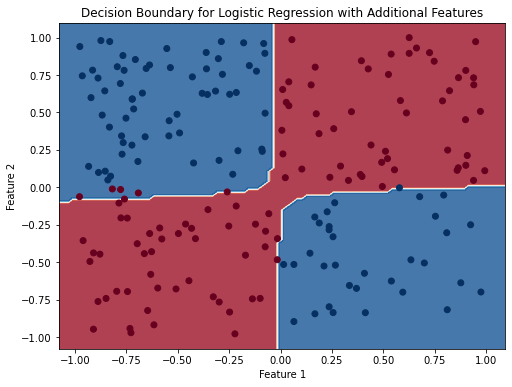

In [8]:
# Add additional features
X_train_extra = torch.cat((X_train, X_train[:, 0].reshape(-1, 1) * X_train[:, 1].reshape(-1, 1),
                           X_train[:, 0].reshape(-1, 1) ** 2, X_train[:, 1].reshape(-1, 1) ** 2), dim=1)

X_test_extra = torch.cat((X_test, X_test[:, 0].reshape(-1, 1) * X_test[:, 1].reshape(-1, 1),
                          X_test[:, 0].reshape(-1, 1) ** 2, X_test[:, 1].reshape(-1, 1) ** 2), dim=1)

# Define Logistic Regression model
class LogisticRegression(nn.Module):
    def __init__(self, input_size):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

# Train Logistic Regression model
def train_model(model, X_train, y_train, epochs=300, lr=0.1):
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        # if epoch % 20 == 0:
        #     print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")

    # Print final optimized parameters
    print(f"Final optimized parameters for {type(model).__name__}:")
    for name, param in model.named_parameters():
        print(f"{name}: {param}")

torch.manual_seed(42)
np.random.seed(42)
logistic_model = LogisticRegression(input_size=X_train_extra.shape[1])
train_model(logistic_model, X_train_extra, y_train)

# Evaluate the model
def evaluate_model(model, X_test, y_test):
    with torch.no_grad():
        model.eval()
        outputs = model(X_test)
        predicted = (outputs >= 0.5).float()
        accuracy = (predicted == y_test).float().mean()
        print(f"Accuracy: {accuracy.item()}")

evaluate_model(logistic_model, X_test_extra, y_test)

# Function to plot decision boundary
def plot_decision_boundary(model, X, y):
    model.eval()
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = torch.meshgrid(torch.linspace(x_min, x_max, 100), torch.linspace(y_min, y_max, 100))
    Z = model(torch.cat((xx.reshape(-1, 1), yy.reshape(-1, 1), 
                         (xx.reshape(-1, 1) * yy.reshape(-1, 1)),
                         (xx.reshape(-1, 1) ** 2), 
                         (yy.reshape(-1, 1) ** 2)), dim=1))
    Z = (Z >= 0.5).float().reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

# Plot decision boundary
plt.figure(figsize=(8, 6))
plot_decision_boundary(logistic_model, X_test, y_test)
plt.title('Decision Boundary for Logistic Regression with Additional Features')
plt.show()


MLP: will only give linear classification for the dataset
MLP with L1-penalty: due to L-1 penalty some of the weights become sparse data which helps to do feature selection with layers, hence give some 
improved accurancy on testing dataset

MLP with L2-penalty: as L-2 penalty uses sum of squares of weights, it helps to keep lower passible values of weights which can prevent the overfitting of model on training dataset. hence it also improved accuracy on testing dataset.